In [2]:
%config Completer.use_jedi = False

In [3]:
cd

/home/sunny


In [4]:
cd extra_learning/flask/keywords\ similarity\ app\ feb\ 16

/home/sunny/extra_learning/flask/keywords similarity app feb 16


In [5]:
cd env_keyword/keyword_app/

/home/sunny/extra_learning/flask/keywords similarity app feb 16/env_keyword/keyword_app


In [55]:
import networkx as nx

In [7]:
H = nx.read_gml("Author_keywords_818.gml")

In [8]:
H.number_of_nodes()

818

In [12]:
import seaborn as sns

In [14]:
import numpy as np 

In [16]:
import collections

## Node frequency distribution 

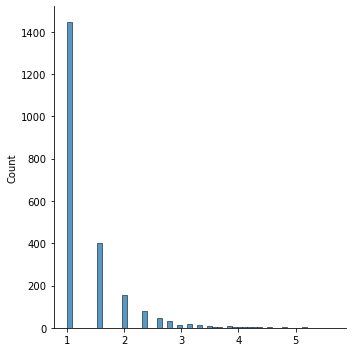

In [15]:
sns.displot([np.log2(i[2]['efreq']) for i in H.edges(data=True)])

In [18]:
edge_freq=collections.Counter([i[2]['efreq'] for i in H.edges(data=True)])

In [28]:
efreq_log=[(i,np.log2(edge_freq[i])) for i in edge_freq]

In [30]:
[i[0] for i in efreq_log]

[3,
 2,
 6,
 4,
 7,
 5,
 9,
 12,
 8,
 10,
 14,
 11,
 21,
 29,
 50,
 16,
 17,
 18,
 23,
 24,
 13,
 15,
 20,
 28,
 41,
 36,
 25,
 27]

In [34]:
efreq_log=sorted(efreq_log)

In [56]:
import matplotlib.pyplot as plt

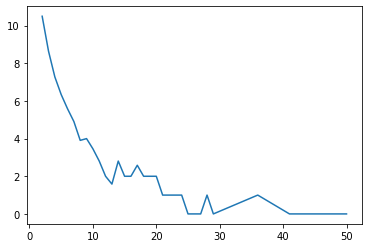

In [39]:
fig, ax = plt.subplots()
ax.plot([i[0] for i in efreq_log], [i[1] for i in efreq_log])


In [45]:
[edge_freq[i] for i in sorted(edge_freq)]

[1448,
 401,
 155,
 81,
 48,
 30,
 15,
 16,
 11,
 7,
 4,
 3,
 7,
 4,
 4,
 6,
 4,
 4,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1]

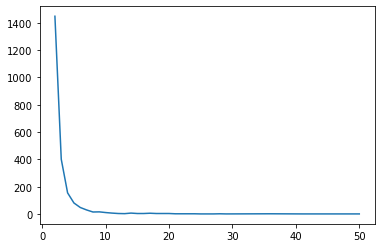

In [46]:
fig, ax = plt.subplots()
ax.plot([i for i in sorted(edge_freq)], [edge_freq[i] for i in sorted(edge_freq)])

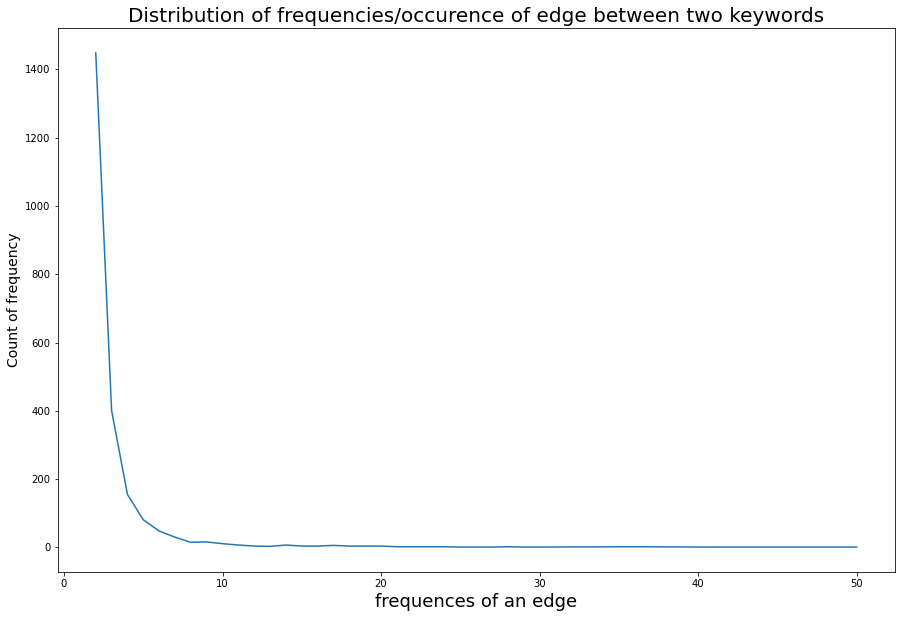

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i for i in sorted(edge_freq)], [edge_freq[i] for i in sorted(edge_freq)])
ax.set_title('Distribution of frequencies/occurence of edge between two keywords',fontsize=20)
ax.set_ylabel('Count of frequency',fontsize=14)
ax.set_xlabel('frequences of an edge',fontsize=18)
plt.savefig('edge_freq_distribution_author_keywords.png',dpi=300)

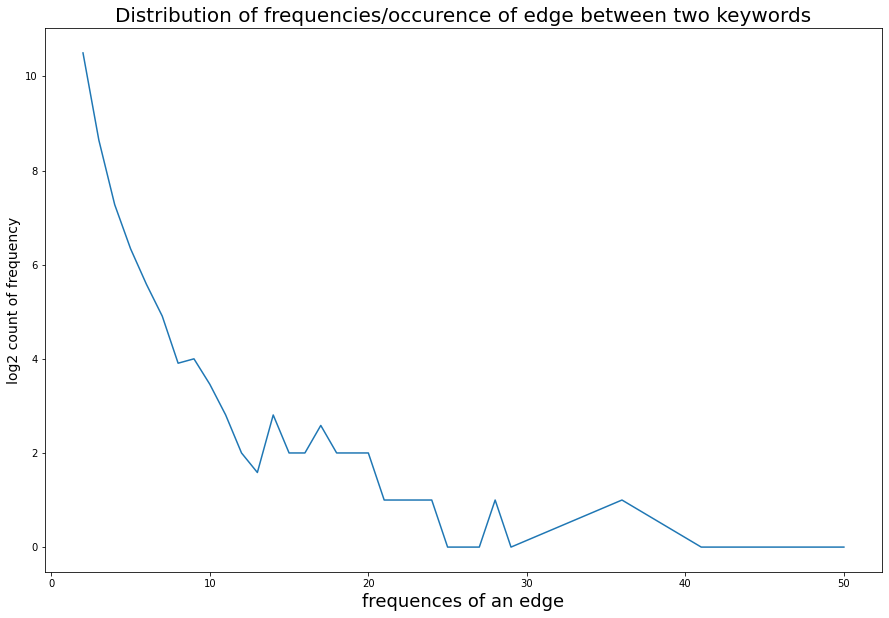

In [51]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i[0] for i in efreq_log], [i[1] for i in efreq_log])
ax.set_title('Distribution of frequencies/occurence of edge between two keywords',fontsize=20)
ax.set_ylabel('log2 count of frequency',fontsize=14)
ax.set_xlabel('frequences of an edge',fontsize=18)
plt.savefig('edge_freq_distribution_author_keywords_log.png',dpi=300)

In [53]:
pwd

'/home/sunny/extra_learning/flask/keywords similarity app feb 16/env_keyword/keyword_app'

## Node frequency distribution 

In [54]:
node_freq=collections.Counter([i[1]['freq'] for i in H.nodes(data=True)])

In [55]:
node_freq

Counter({9: 20,
         4: 103,
         5: 63,
         3: 117,
         12: 21,
         2: 174,
         7: 31,
         13: 18,
         16: 13,
         6: 53,
         18: 9,
         15: 11,
         46: 1,
         28: 2,
         14: 13,
         11: 10,
         8: 33,
         51: 2,
         21: 4,
         111: 1,
         19: 4,
         75: 1,
         22: 3,
         30: 4,
         125: 2,
         120: 1,
         131: 1,
         26: 1,
         54: 1,
         53: 1,
         29: 2,
         165: 1,
         10: 24,
         17: 10,
         20: 6,
         24: 3,
         1: 8,
         36: 2,
         177: 1,
         65: 1,
         41: 1,
         69: 1,
         42: 2,
         782: 1,
         31: 1,
         34: 3,
         47: 4,
         38: 4,
         32: 3,
         173: 1,
         87: 2,
         25: 2,
         187: 1,
         23: 1,
         27: 1,
         33: 3,
         37: 3,
         45: 1,
         74: 1,
         101: 1,
         77: 1,
    

## Full network

In [7]:
A = nx.read_gml("Author_keywords.gml")

In [8]:
A.number_of_nodes()

7224

In [9]:
A.number_of_edges()

33263

In [10]:
nx.number_connected_components(A)

79

In [11]:
len(list(nx.connected_components(A)))

79

In [62]:
[len(i) for i in list(nx.connected_components(A))]

[6889,
 7,
 6,
 4,
 3,
 5,
 5,
 5,
 4,
 3,
 3,
 7,
 5,
 6,
 4,
 5,
 3,
 6,
 5,
 5,
 5,
 3,
 5,
 3,
 5,
 6,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 2,
 6,
 4,
 6,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 1,
 4,
 4,
 4,
 4,
 3,
 2,
 5,
 4,
 5,
 4,
 4,
 5,
 1,
 6,
 4,
 5,
 3,
 4,
 4,
 4,
 2,
 2,
 4,
 5,
 1,
 5]

### Single biggest component has 6889 nodes and other 78 have less than 10 nodes individually. 

In [12]:
len([i for i in A.edges(data=True) if i[2]['efreq'] >1])

2300

### Out of 33263 edges only 2300 edges has efreq greater than 1 

## Select biggest component 

In [13]:
largest_cc = max(nx.connected_components(A), key=len)

In [14]:
len(largest_cc)

6889

In [15]:
H=A.subgraph(largest_cc)

In [16]:
H.number_of_nodes()

6889

In [22]:
H.number_of_edges()

32653

In [23]:
len([i for i in H.edges(data=True) if i[2]['efreq'] >1])

2290

### get edges whose has efreq==1

In [19]:
r_edge=[]
for i in  H.edges(data=True):
    if i[2]['efreq']==1:
        r_edge.append(i)

In [20]:
len(r_edge)

30363

In [24]:
H.remove_edges_from(r_edge)

NetworkXError: Frozen graph can't be modified

In [25]:
nx.is_frozen(H)

True

In [26]:
C = nx.Graph(H)

In [27]:
nx.is_frozen(C)

False

In [28]:
C.remove_edges_from(r_edge)

In [29]:
C.number_of_nodes()

6889

In [30]:
C.number_of_edges()

2290

In [31]:
nx.number_connected_components(C)

6047

In [33]:
sorted([len(i) for i in list(nx.connected_components(C))],reverse=True)

[818,
 4,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

### After removing the edge with efeq equal to 1 , the graph has 6047 components and biggest one with 818 nodes and rest are either singleton or few nodes.

In [35]:
largest_cc = max(nx.connected_components(C), key=len)

In [36]:
len(largest_cc)

818

In [37]:
H=C.subgraph(largest_cc)

In [38]:
H.number_of_nodes()

818

In [39]:
H.number_of_edges()

2263

### biggest components has 818 nodes and 2263 edges 

In [46]:
import seaborn as sns

## Degree distribution of this graph

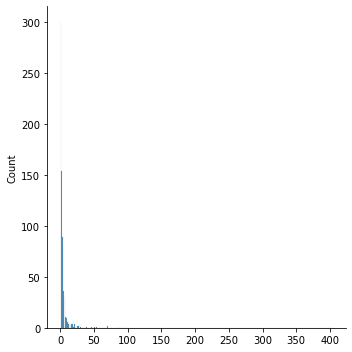

In [47]:
sns.displot([i[1] for i in H.degree()])

In [49]:
import collections

In [51]:
collections.Counter([i[1] for i in H.degree()]).most_common()

[(1, 300),
 (2, 154),
 (3, 89),
 (4, 80),
 (5, 36),
 (7, 31),
 (6, 27),
 (8, 11),
 (9, 10),
 (13, 7),
 (10, 7),
 (11, 6),
 (14, 5),
 (21, 4),
 (17, 4),
 (18, 4),
 (12, 4),
 (15, 3),
 (19, 2),
 (27, 2),
 (28, 2),
 (16, 2),
 (70, 2),
 (92, 2),
 (26, 2),
 (87, 1),
 (20, 1),
 (38, 1),
 (76, 1),
 (51, 1),
 (23, 1),
 (44, 1),
 (39, 1),
 (84, 1),
 (32, 1),
 (67, 1),
 (34, 1),
 (403, 1),
 (54, 1),
 (50, 1),
 (35, 1),
 (46, 1),
 (22, 1),
 (30, 1),
 (59, 1),
 (99, 1),
 (31, 1)]

In [52]:
degree_dist=collections.Counter([i[1] for i in H.degree()])

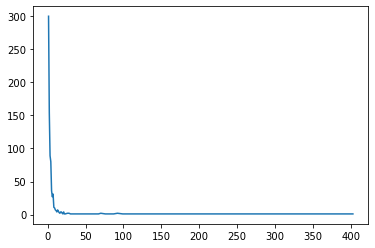

In [57]:
fig, ax = plt.subplots()
ax.plot([i for i in sorted(degree_dist)], [degree_dist[i] for i in sorted(degree_dist)])

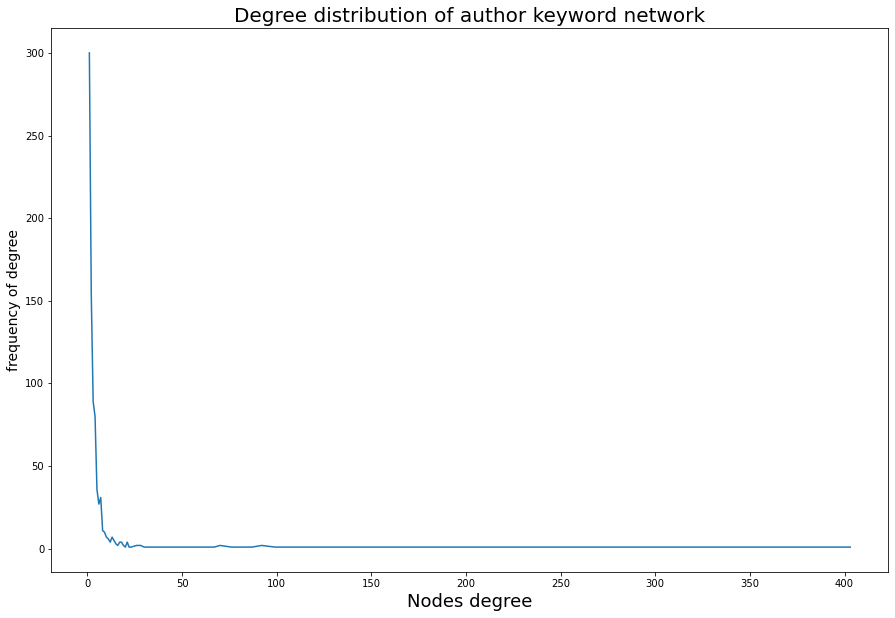

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i for i in sorted(degree_dist)], [degree_dist[i] for i in sorted(degree_dist)])
ax.set_title('Degree distribution of author keyword network',fontsize=20)
ax.set_ylabel('frequency of degree',fontsize=14)
ax.set_xlabel('Nodes degree',fontsize=18)
plt.savefig('edge_freq_distribution_author_keywords.png',dpi=300)

In [61]:
import numpy as np

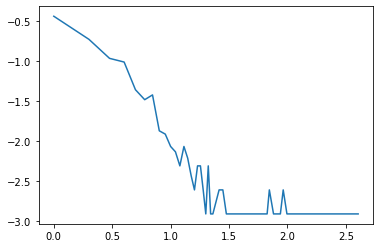

In [67]:
fig, ax = plt.subplots()
ax.plot([np.log10(i) for i in sorted(degree_dist)], [np.log10(degree_dist[i]/818) for i in sorted(degree_dist)])

In [64]:
sum([degree_dist[i] for i in sorted(degree_dist)])

818

In [68]:
H.number_of_nodes()

818

In [73]:
sorted([i[1]['freq']  for i in H.nodes(data=True)],reverse=True)

[782,
 187,
 177,
 173,
 165,
 161,
 131,
 125,
 125,
 120,
 111,
 101,
 100,
 87,
 87,
 77,
 75,
 74,
 69,
 65,
 60,
 56,
 54,
 53,
 51,
 51,
 47,
 47,
 47,
 47,
 46,
 45,
 42,
 42,
 41,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 36,
 36,
 34,
 34,
 34,
 33,
 33,
 33,
 32,
 32,
 32,
 31,
 30,
 30,
 30,
 30,
 29,
 29,
 28,
 28,
 27,
 26,
 25,
 25,
 24,
 24,
 24,
 23,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 1

In [82]:
sorted([i for i in H.nodes(data=True)],key=lambda i:i[1]['freq'], reverse=True)[:20]

[('biodegradation', {'freq': 782}),
 ('biodegradable', {'freq': 187}),
 ('mechanical properties', {'freq': 177}),
 ('microplastics', {'freq': 173}),
 ('biodegradable plastic', {'freq': 165}),
 ('degradation', {'freq': 161}),
 ('biodegradability', {'freq': 131}),
 ('bioplastics', {'freq': 125}),
 ('polylactic acid', {'freq': 125}),
 ('plastics', {'freq': 120}),
 ('biodegradable polymers', {'freq': 111}),
 ('polyhydroxyalkanoates (pha)', {'freq': 101}),
 ('polyethylene', {'freq': 100}),
 ('poly(ε-caprolactone)', {'freq': 87}),
 ('starch', {'freq': 87}),
 ('biofilm', {'freq': 77}),
 ('biopolymers', {'freq': 75}),
 ('composites', {'freq': 74}),
 ('polyethylene terephthalate (pet)', {'freq': 69}),
 ('thermoplastic starch', {'freq': 65})]

In [76]:
[i for i in H.nodes(data=True)]

[('organoclay', {'freq': 6}),
 ('quality', {'freq': 4}),
 ('seed dust-off', {'freq': 2}),
 ('cellulose and other wood products', {'freq': 3}),
 ('ocean', {'freq': 4}),
 ('soil temperature', {'freq': 5}),
 ('elastomer', {'freq': 25}),
 ('nanoclay', {'freq': 10}),
 ('bacterial consortium', {'freq': 6}),
 ('toxicity', {'freq': 21}),
 ('gut bacteria', {'freq': 4}),
 ('vector', {'freq': 3}),
 ('biodegradable gillnet', {'freq': 2}),
 ('silk fibroin nanoparticles', {'freq': 2}),
 ('industrial ecology', {'freq': 3}),
 ('tissue engineering', {'freq': 33}),
 ('bacillus licheniformis', {'freq': 4}),
 ('degradation', {'freq': 161}),
 ('waste electrical and electronic equipment plastics', {'freq': 2}),
 ('food packaging', {'freq': 17}),
 ('flax fibers', {'freq': 6}),
 ('landfill', {'freq': 32}),
 ('hydroxyl radicals', {'freq': 3}),
 ('surface treatment', {'freq': 6}),
 ('plastic recycling', {'freq': 4}),
 ('graft copolymerization', {'freq': 3}),
 ('low-density polyethylene (ldpe)', {'freq': 33}),
 

## remove top nodes with obivious keywords from search 

In [83]:
[j[0] for j in sorted([i for i in H.nodes(data=True)],key=lambda i:i[1]['freq'], reverse=True)[:20]]

['biodegradation',
 'biodegradable',
 'mechanical properties',
 'microplastics',
 'biodegradable plastic',
 'degradation',
 'biodegradability',
 'bioplastics',
 'polylactic acid',
 'plastics',
 'biodegradable polymers',
 'polyhydroxyalkanoates (pha)',
 'polyethylene',
 'poly(ε-caprolactone)',
 'starch',
 'biofilm',
 'biopolymers',
 'composites',
 'polyethylene terephthalate (pet)',
 'thermoplastic starch']

In [113]:
n_remove=['biodegradation']

In [114]:
H.remove_nodes_from(n_remove)

NetworkXError: Frozen graph can't be modified

In [115]:
nx.is_frozen(H)

True

In [116]:
C = nx.Graph(H)

In [117]:
nx.is_frozen(C)

False

In [118]:
C.remove_nodes_from(n_remove)

In [119]:
C.number_of_nodes()

817

In [120]:
C.number_of_edges()

1860

In [121]:
H.number_of_nodes()

818

In [122]:
H.number_of_edges()

2263

### After removing the highly connected  node which are directlly related to search term plastic degradation,
### We reduce number of nodes from 818 to 817 and number of edges to 1860 from 2263

In [123]:
nx.number_connected_components(C)

103

In [124]:
sorted([len(i) for i in list(nx.connected_components(C))],reverse=True)

[707,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [125]:
sum([True for i in list(nx.connected_components(C)) if len(i)==1])

97

### Out of 103 component found after removing the nodes, 97 are found singleton and directly connected to highly connected node

In [139]:
largest_cc = max(nx.connected_components(C), key=len)

In [140]:
H=C.subgraph(largest_cc)

## retest the power law distribution 

In [141]:
degree_dist=collections.Counter([i[1] for i in H.degree()])

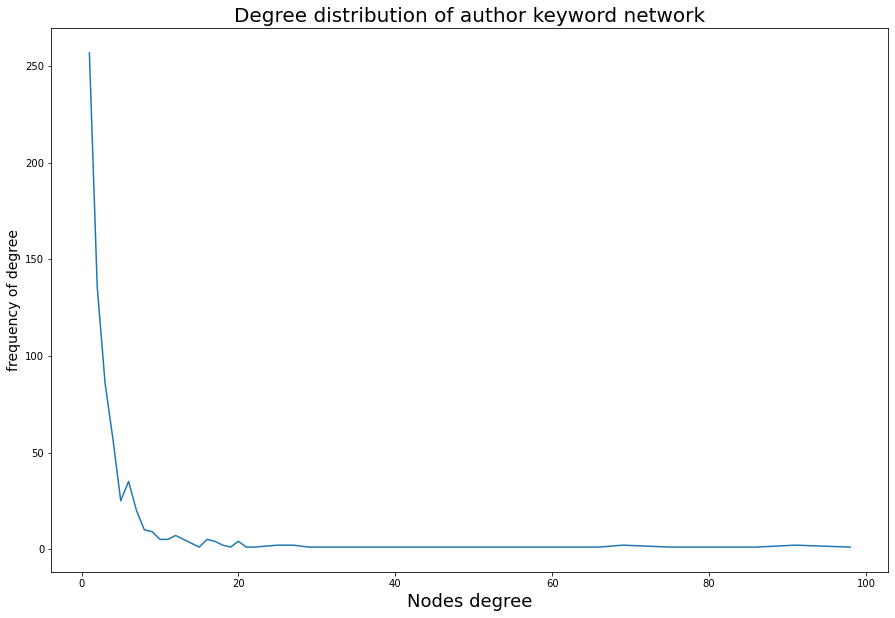

In [142]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([i for i in sorted(degree_dist)], [degree_dist[i] for i in sorted(degree_dist)])
ax.set_title('Degree distribution of author keyword network',fontsize=20)
ax.set_ylabel('frequency of degree',fontsize=14)
ax.set_xlabel('Nodes degree',fontsize=18)
plt.savefig('edge_freq_distribution_author_keywords.png',dpi=300)

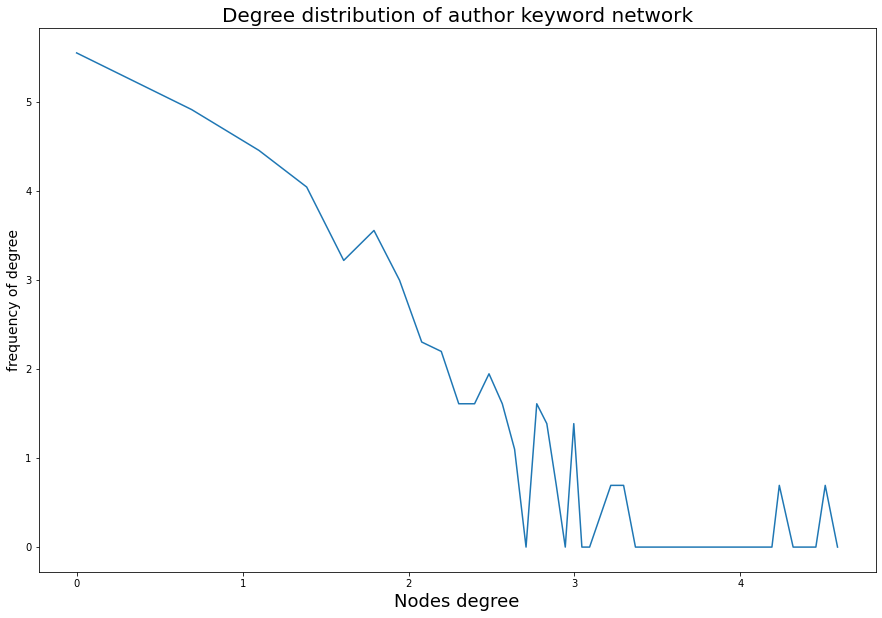

In [172]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot([np.log(i) for i in sorted(degree_dist)], [np.log(degree_dist[i]) for i in sorted(degree_dist)])
ax.set_title('Degree distribution of author keyword network',fontsize=20)
ax.set_ylabel('frequency of degree',fontsize=14)
ax.set_xlabel('Nodes degree',fontsize=18)
plt.savefig('edge_freq_distribution_author_keywords.png',dpi=300)

## fitting a line on log log plot

In [171]:
powerlaw = lambda x, amp, index: amp * (x**index)

In [241]:
def fitfunc(x,a,b):
    return a+(b*x)

In [190]:
x=[np.log(i) for i in sorted(degree_dist)]

In [191]:
y=[np.log(degree_dist[i]) for i in sorted(degree_dist)]

In [199]:
from scipy.optimize import curve_fit


In [253]:
popt, pcov = curve_fit(fitfunc, x, y,p0=[1,-1],maxfev=2000)

In [254]:
popt

array([ 5.05991189, -1.30126932])

In [252]:
popt

array([ 5.05991189, -1.30126932])

In [255]:
pcov

array([[ 0.0901656 , -0.02655179],
       [-0.02655179,  0.00873219]])

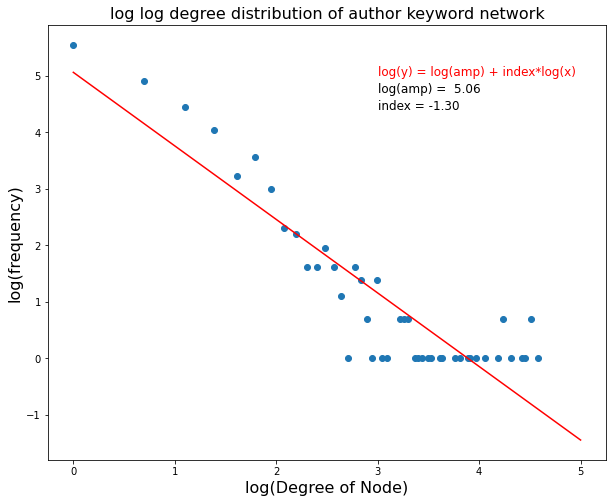

In [294]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x,y)
ax.plot(xdata,ydata,color='red')
ax.text(3, 5, 'log(y) = log(amp) + index*log(x)', fontsize=12,color='red')
ax.text(3, 4.7, 'log(amp) = %5.2f ' %(popt[0]),fontsize=12)
ax.text(3, 4.4, 'index = %5.2f ' %(popt[1]),fontsize=12)
ax.set_title('log log degree distribution of author keyword network',fontsize=16)
ax.set_xlabel('log(Degree of Node)',fontsize=16)
ax.set_ylabel('log(frequency)', fontsize=16)
plt.savefig('log log degree distribution of author keyword network.png',dpi=300)

In [223]:
xdata = np.linspace(0, 5, 50)      

In [245]:
ydata= fitfunc(xdata,popt[0],popt[1])

In [242]:
fitfunc(0,popt[0],popt[1])

1.6458467305293356

In [257]:
amp = np.e**popt[0]

In [261]:
y=powerlaw(np.linspace(1,100,100),amp,popt[1])

array([157.57663241,  63.93971823,  37.7249407 ,  25.94475783,
        19.40633817,  15.30761282,  12.52540178,  10.52757937,
         9.03161293,   7.87449113,   6.9559983 ,   6.2113553 ,
         5.59695107,   5.08242021,   4.6460122 ,   4.27176573,
         3.94772042,   3.66474887,   3.41577291,   3.19522468,
         2.99866822,   2.82252872,   2.66389538,   2.52037565,
         2.3899861 ,   2.27106944,   2.16223089,   2.06228875,
         1.97023564,   1.88520789,   1.80646105,   1.73335026,
         1.66531433,   1.60186271,   1.5425649 ,   1.48704162,
         1.43495747,   1.38601488,   1.33994897,   1.29652324,
         1.25552588,   1.21676671,   1.18007452,   1.14529476,
         1.1122876 ,   1.08092626,   1.0510955 ,   1.0226904 ,
         0.9956152 ,   0.96978236,   0.9451117 ,   0.92152966,
         0.89896862,   0.87736634,   0.85666544,   0.83681292,
         0.81775977,   0.79946062,   0.78187338,   0.76495899,
         0.74868112,   0.73300596,   0.71790201,   0.70

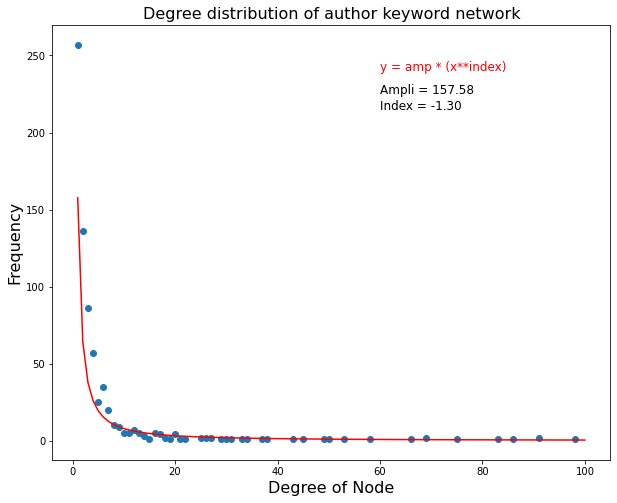

In [286]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter([i for i in sorted(degree_dist)], [degree_dist[i] for i in sorted(degree_dist)])
ax.plot(np.linspace(1,100,100),powerlaw(np.linspace(1,100,100),amp,popt[1]),color='red')
ax.text(60, 225, 'Ampli = %5.2f ' %(amp),fontsize=12)
ax.text(60, 215, 'Index = %5.2f ' %(popt[1]),fontsize=12)
ax.text(60, 240, 'y = amp * (x**index)', fontsize=12,color='red')
ax.set_title('Degree distribution of author keyword network',fontsize=16)
ax.set_xlabel('Degree of Node',fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
plt.savefig('Degree distribution of author keyword network.png',dpi=300)

## Node frequency distribution 

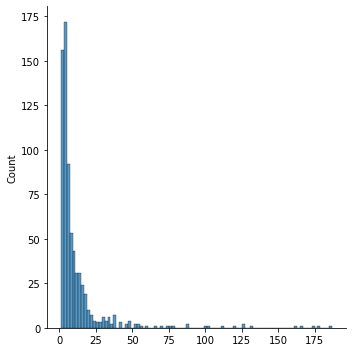

In [300]:
sns.displot([i[1]['freq'] for i in H.nodes(data=True)])

In [304]:
node_dist=collections.Counter([i[1]['freq'] for i in H.nodes(data=True)])

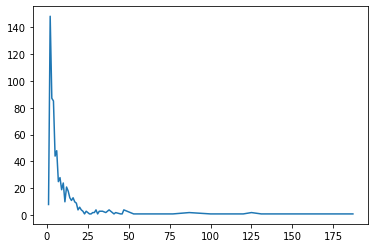

In [305]:
fig, ax = plt.subplots()
ax.plot([i for i in sorted(node_dist)], [node_dist[i] for i in sorted(node_dist)])

In [308]:
np.average([i[1]['freq'] for i in H.nodes(data=True)])

11.437057991513438

### Average node frequency is 11.437057991513438

In [348]:
x=[np.log(i) for i in sorted(node_dist)]

In [349]:
y=[np.log(node_dist[i]) for i in sorted(node_dist)]

In [350]:
x=x[1:]

In [351]:
y=y[1:]

In [352]:
popt, pcov = curve_fit(fitfunc, x, y,p0=[5,-2],maxfev=2000)

In [353]:
popt

array([ 5.3139976 , -1.18799901])

In [331]:
popt

array([ 5.3139976 , -1.18799901])

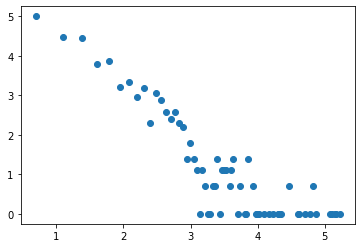

In [354]:
fig, ax = plt.subplots()
ax.scatter(x,y)

In [355]:
xdata = np.linspace(0, 5, 50) 

In [356]:
ydata= fitfunc(xdata,popt[0],popt[1])

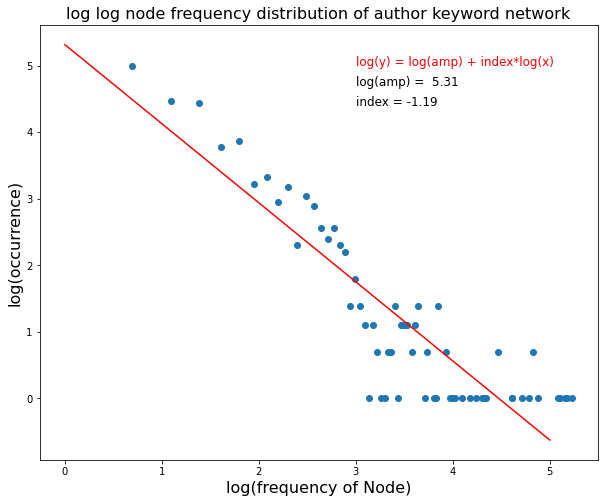

In [359]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x,y)
ax.plot(xdata,ydata,color='red')
ax.text(3, 5, 'log(y) = log(amp) + index*log(x)', fontsize=12,color='red')
ax.text(3, 4.7, 'log(amp) = %5.2f ' %(popt[0]),fontsize=12)
ax.text(3, 4.4, 'index = %5.2f ' %(popt[1]),fontsize=12)
ax.set_title('log log node frequency distribution of author keyword network',fontsize=16)
ax.set_xlabel('log(frequency of Node)',fontsize=16)
ax.set_ylabel('log(occurrence)', fontsize=16)
plt.savefig('log log node frequency distribution of author keyword network.png',dpi=300)

In [337]:
amp = np.e**popt[0]

In [338]:
amp

203.16076289227664

In [339]:
y=powerlaw(np.linspace(1,100,100),amp,popt[1])

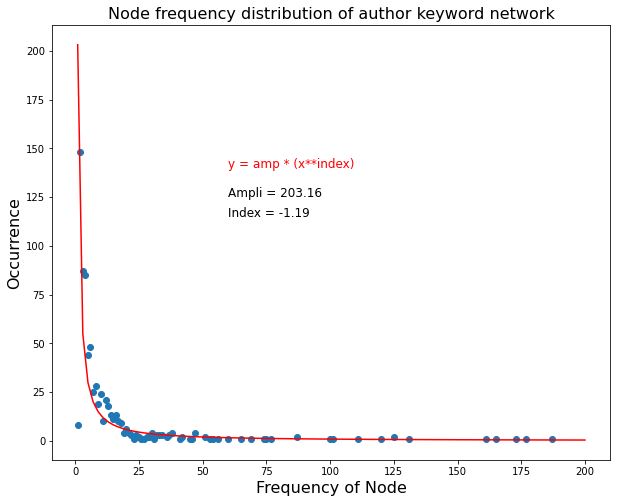

In [346]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter([i for i in sorted(node_dist)], [node_dist[i] for i in sorted(node_dist)])
ax.plot(np.linspace(1,200,100),powerlaw(np.linspace(1,200,100),amp,popt[1]),color='red')
ax.text(60, 125, 'Ampli = %5.2f ' %(amp),fontsize=12)
ax.text(60, 115, 'Index = %5.2f ' %(popt[1]),fontsize=12)
ax.text(60, 140, 'y = amp * (x**index)', fontsize=12,color='red')
ax.set_title('Node frequency distribution of author keyword network',fontsize=16)
ax.set_xlabel('Frequency of Node',fontsize=16)
ax.set_ylabel('Occurrence', fontsize=16)
plt.savefig('Node frequency distribution of author keyword network.png',dpi=300)

## edge frequency distribution 

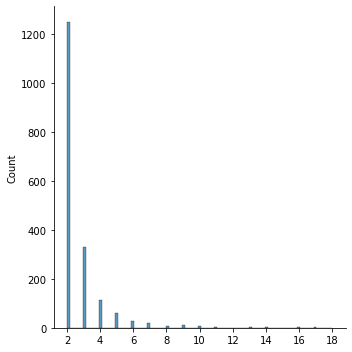

In [364]:
sns.displot([i[2]['efreq'] for i in H.edges(data=True)])

In [365]:
edge_dist=collections.Counter([i[2]['efreq'] for i in H.edges(data=True)])

In [366]:
edge_dist

Counter({2: 1251,
         3: 330,
         5: 62,
         4: 112,
         11: 5,
         9: 13,
         8: 9,
         13: 2,
         14: 3,
         6: 27,
         10: 7,
         7: 21,
         16: 3,
         12: 1,
         17: 3,
         15: 1,
         18: 1})

In [367]:
np.average([i[2]['efreq'] for i in H.edges(data=True)])

2.7471636952998377

### Average number of edge frequency is 2.7471636952998377

In [389]:
x=[np.log(i) for i in sorted(edge_dist)]

In [390]:
y=[np.log(edge_dist[i]) for i in sorted(edge_dist)]

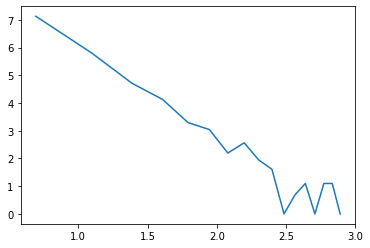

In [372]:
fig, ax = plt.subplots()
ax.plot(x,y)

In [375]:
popt, pcov = curve_fit(fitfunc, x, y,p0=[4,-1],maxfev=2000)

In [376]:
popt

array([ 9.13481185, -3.15612328])

In [377]:
amp = np.e**popt[0]

In [381]:
y=powerlaw(np.linspace(2,100,100),amp,popt[1])

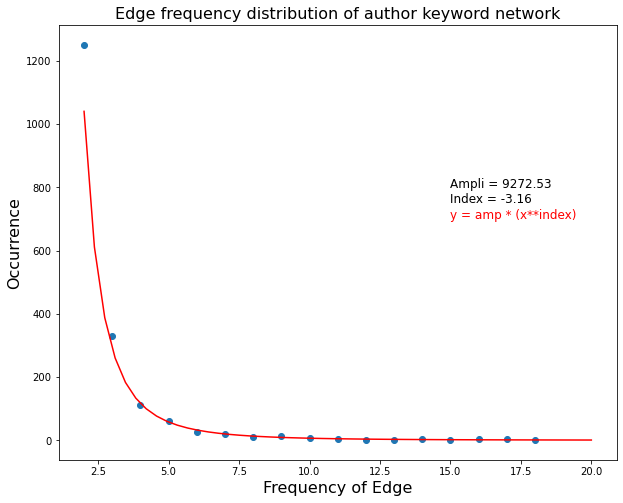

In [388]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter([i for i in sorted(edge_dist)], [edge_dist[i] for i in sorted(edge_dist)])
ax.plot(np.linspace(2,20,50),powerlaw(np.linspace(2,20,50),amp,popt[1]),color='red')
ax.text(15, 800, 'Ampli = %5.2f ' %(amp),fontsize=12)
ax.text(15, 750, 'Index = %5.2f ' %(popt[1]),fontsize=12)
ax.text(15, 700, 'y = amp * (x**index)', fontsize=12,color='red')
ax.set_title('Edge frequency distribution of author keyword network',fontsize=16)
ax.set_xlabel('Frequency of Edge',fontsize=16)
ax.set_ylabel('Occurrence', fontsize=16)
plt.savefig('Edge frequency distribution of author keyword network.png',dpi=300)

In [403]:
xdata= np.linspace(0.5, 3, 25) 

In [404]:
ydata= fitfunc(xdata,popt[0],popt[1])

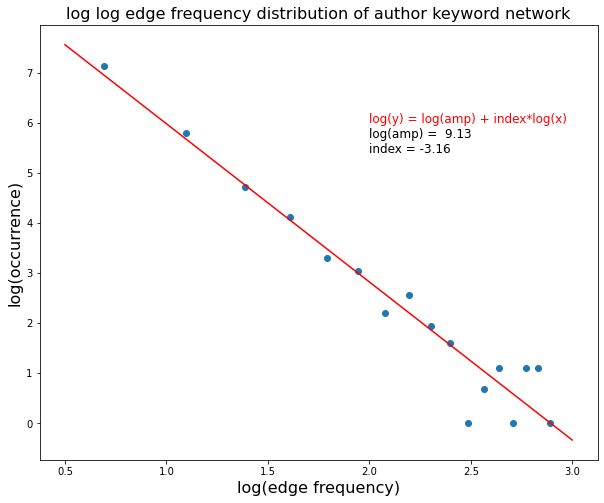

In [409]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x,y)
ax.plot(xdata,ydata,color='red')
ax.text(2, 6, 'log(y) = log(amp) + index*log(x)', fontsize=12,color='red')
ax.text(2, 5.7, 'log(amp) = %5.2f ' %(popt[0]),fontsize=12)
ax.text(2, 5.4, 'index = %5.2f ' %(popt[1]),fontsize=12)
ax.set_title('log log edge frequency distribution of author keyword network',fontsize=16)
ax.set_xlabel('log(edge frequency)',fontsize=16)
ax.set_ylabel('log(occurrence)', fontsize=16)
plt.savefig('log log edge frequency distribution of author keyword network.png',dpi=300)

In [396]:
x[-1]

2.8903717578961645

In [395]:
y

[7.1316985104669115,
 5.799092654460527,
 4.718498871295094,
 4.127134385045092,
 3.295836866004329,
 3.044522437723423,
 2.1972245773362196,
 2.5649493574615367,
 1.9459101490553132,
 1.6094379124341003,
 0.0,
 0.6931471805599453,
 1.0986122886681098,
 0.0,
 1.0986122886681098,
 1.0986122886681098,
 0.0]

# Community on remaining network

In [129]:
import networkx.algorithms.community as nx_comm

In [150]:
communities = nx_comm.girvan_newman(H)

In [148]:
top_level_communities = next(communities)

In [149]:
[len(i) for i in top_level_communities]

[687, 20]

In [151]:
node_groups=[]
for i in range(50):
    print(i)
    com=next(communities)
    node_groups.append(list(com))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [152]:
lines=[]
for i in range(1,50):
    for j,l in enumerate(node_groups[i]):
        for k,m in enumerate(node_groups[i-1]):
             if len(set(l).intersection(m))==len(m) and len(l)==len(m):
                    lines.append([i-1,k,i,j,'blue'])
             elif len(set(l).intersection(m))==len(l) and len(l)!=len(m):
                    lines.append([i-1,k,i,j,'red'])

In [154]:
x=[]
for k in range(4,54):
    x.append(np.linspace(0, 50, k))

In [155]:
y=[j for j in sorted([i for i in range(1,51)],reverse=True)]

In [156]:
points=[]
for i in range(50):
    s=[]
    for j in x[i][1:-1]:
        s.append((j,y[i]))
    points.append(s)

[None]

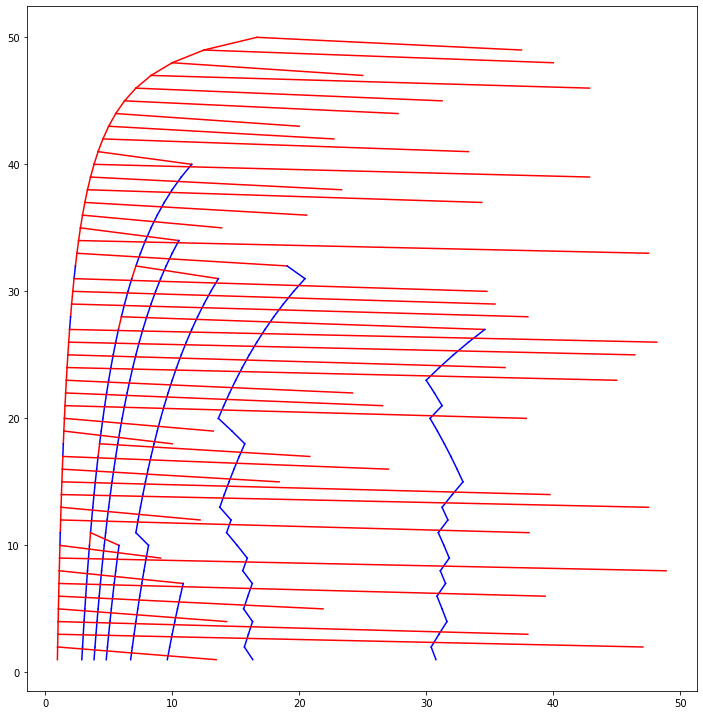

In [158]:
fig, ax = plt.subplots(figsize=(12, 13))
for i in lines:
    if len(node_groups[i[0]][i[1]])>20:
        ax.plot([points[i[0]][i[1]][0],points[i[2]][i[3]][0]],[points[i[0]][i[1]][1],points[i[2]][i[3]][1]],color=i[-1])
ax.set(aspect=1)

## louvain_partitions of Network

In [163]:
cd

/home/sunny


In [164]:
cd plastic\ literature\ network\ and\ modeling

/home/sunny/plastic literature network and modeling


In [165]:
ls

'combine the row scopus files.ipynb'
'community detection algo on author keyword network.ipynb'
'community detection on author keyword network.ipynb'


### louvain_partitions will execute on command line to availability with py10 conda env 

In [166]:
H.number_of_nodes()

707

In [168]:
nx.write_gml(H, "Author_keywords707.gml")

In [170]:
ls

 Author_keywords707.gml
'combine the row scopus files.ipynb'
'community detection algo on author keyword network.ipynb'
'community detection on author keyword network.ipynb'


In [410]:
pwd

'/home/sunny/plastic literature network and modeling'

In [411]:
ls

'author keyword network curve fitting .ipynb'
 Author_keywords707.gml
'Author keywords network images'/
'combine the row scopus files.ipynb'
'community composition and comparison on author keyword network .ipynb'
